_____

# <center>**MILESTONE 2**</center>


___


# **i. Introduction**

Nama : Danisa Rahadian Abimanyu

Link huggingface : https://huggingface.co/spaces/danisarahadians/milestone_2_danisa

Link Kaggle : https://www.kaggle.com/datasets/bhadaneeraj/cardio-vascular-disease-detection?select=cardio_train.csv

# **Background**

Cardiovascular adalah istilah untuk sesuatu yang berkaitan dengan jantung dan pembuluh darah. Sistem kardiovaskular (cardiovascular system) adalah sistem dalam tubuh manusia yang terdiri dari jantung dan jaringan pembuluh darah, yang bertugas untuk memompa darah ke seluruh tubuh. Penyakit kardiovaskular mencakup berbagai kondisi yang mempengaruhi jantung dan pembuluh darah, termasuk penyakit jantung koroner, hipertensi, stroke, gagal jantung, dan lain-lain. 

Dalam waktu 3 bulan, membangun model prediktif dengan recall minimal 70% yang dapat mengklasifikasikan risiko penyakit kardiovaskular menggunakan fitur seperti usia, jenis kelamin, tinggi, berat badan, tekanan darah, kadar kolesterol, kadar glukosa, kebiasaan merokok, konsumsi alkohol, dan aktivitas fisik, untuk membantu dalam deteksi dini dan pencegahan penyakit kardiovaskular.

# **Plan to solve the problem**

Seorang praktisi kesehatan dari klinik jantung telah merekrut saya untuk melakukan analisis klasifikasi guna mendeteksi risiko penyakit kardiovaskular pada pasien. Dengan harapan, klinik tersebut dapat mengidentifikasi pasien yang berisiko tinggi dan memberikan intervensi dini yang tepat. Program ini dibuat untuk mengklasifikasikan apakah seorang pasien berisiko menderita penyakit kardiovaskular atau tidak, menggunakan metode klasifikasi. Data yang digunakan merupakan data kesehatan pasien yang mencakup informasi seperti usia, jenis kelamin, tekanan darah, kadar kolesterol, indeks massa tubuh (BMI), dan kebiasaan merokok. 

Dalam kasus ini, recall adalah ukuran penting karena kita ingin meminimalkan jumlah False Negative (FN), yaitu kasus di mana pasien yang sebenarnya berisiko terkena diklasifikasikan sebagai tidak berisiko. Dalam konteks kesehatan jantung, FN berarti pasien yang berpotensi mengalami komplikasi serius mungkin tidak menerima penanganan dini dan tepat yang mereka butuhkan. Oleh karena itu, recall memastikan bahwa sebanyak mungkin pasien berisiko teridentifikasi dengan benar.







Dataset ini diambil dari Kaggle Cardiovascular Disease Detection Dataset. Di bawah ini adalah keterangan dari tiap fitur pada dataframe:

| Fitur        | Deskripsi                                                                                          |
|--------------|----------------------------------------------------------------------------------------------------|
| Age          | Usia pasien dalam hari.                                                                            |
| Gender       | Jenis kelamin pasien (1 = perempuan, 2 = laki-laki).                                                |
| Height       | Tinggi badan pasien dalam cm.                                                                      |
| Weight       | Berat badan pasien dalam kg.                                                                       |
| Ap_hi        | Tekanan darah sistolik pasien.                                                                     |
| Ap_lo        | Tekanan darah diastolik pasien.                                                                    |
| Cholesterol  | Kategori kadar kolesterol pasien (1: normal, 2: di atas normal, 3: jauh di atas normal).           |
| Gluc         | Kategori kadar glukosa pasien (1: normal, 2: di atas normal, 3: jauh di atas normal).              |
| Smoke        | Apakah pasien merokok (1: ya, 0: tidak).                                                           |

| Alcohol      | Apakah pasien mengonsumsi alkohol (1: ya, 0: tidak).                                               |
| Active       | Apakah pasien aktif secara fisik (1: ya, 0: tidak).                                                |
| Cardio       | Target variabel yang menunjukkan apakah pasien menderita penyakit kardiovaskular (1: ya, 0: tidak). |


# **ii. Import Libraries**

In [1]:
# Import Library
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np

# library statistik
import phik

# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


# Pemodelan ML
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.exceptions import DataConversionWarning



# Evaluasi model
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Library handling outlier
from feature_engine.outliers import Winsorizer


# Save model
import pickle
import joblib
import json

#library ignore warning

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# **iii. Data Loading**

Pada tahap data loading, kita akan melakukan import data, pengecekan tipe data, jumlah data, dan duplikasi dalam dataset.

In [2]:
# Load dataframe
df = pd.read_csv('cardio_train.csv', delimiter=';')

# Print dataframe
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
# Cek tipe dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


- Data memiliki jumlah entry sebanyak 69301 dengan total 13 kolom
- Seluruh tipe data sudah berupa tipe numerical.

In [4]:
# Cek unique value dalam tiap kolom
df.nunique()

id             69301
age             8069
gender             2
height           108
weight           285
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

Berdasarkan jumlah nuniquenya dapat diketahui bahwa kolom categorical ordinal:  
 
- Gender (code: 1 = perempuan, 2 = laki-laki)  

- Cholesterol: Categorical (1: normal, 2: above normal, 3: well above normal)  

- Gluc: Categorical (1: normal, 2: above normal, 3: well above normal)  

- Smoke: Categorical (binary: 1 = ya, 0 = tidak)  

- Alco: Categorical (binary: 1 = ya, 0 = tidak)  

- Active: Categorical (binary: 1 = ya, 0 = tidak)  

- Cardio: Categorical (binary: 1 = ya, 0 = tidak)  

Sebelum lanjut ke tahap selanjutnya, saya ingin memastikan lagi menggunakan overview untuk categorical column agar lebih jelas.

## **Overview Categorical Column**

### **Overview Gender Column**

In [5]:
# Check unique value in column gender
df['gender'].unique()

array([1, 2])

- Kolom Gender memiliki kategori, yaitu ( 1 = perempuan, 2 = laki-laki)

### **Overview Cholesterol Column**

In [6]:
# Check unique value in column cholesterol
df['cholesterol'].unique()

array([2, 1, 3])

- Kolom Cholesterol memiliki 3 kategori, yaitu (1: normal, 2: above normal, 3: well above normal)  

### **Overview Gluc Column**

In [7]:
# Check unique value in column gluc
df['gluc'].unique()

array([2, 1, 3])

- Kolom Gluc memiliki 3 kategori, yaitu (1: normal, 2: above normal, 3: well above normal)  

### **Overview Smoke Column**

In [8]:
# Check unique value in column smoke
df['smoke'].unique()

array([0, 1])

- Kolom smoke memiliki 2 kategori, yaitu (1 = ya, 0 = tidak)  

### **Overview Alco Column**

In [9]:
# Check unique value in column alco
df['alco'].unique()

array([0, 1])

- Kolom alco memiliki 2 kategori, yaitu (1 = ya, 0 = tidak)  

### **Overview Active Column**

In [10]:
# Check unique value in column active
df['active'].unique()

array([1, 0])

- Kolom active memiliki 2 kategori, yaitu (1 = ya, 0 = tidak)  

### **Overview Cardio Column**

In [11]:
# Check unique value in column gender
df['cardio'].unique()

array([0, 1])

- Kolom cardio memiliki 2 kategori, yaitu (1 = ya, 0 = tidak) 

Selanjutnya kita akan melakukan pengecekan duplikasi dalam dataset, jika ada data yang duplicate maka kita akan handle dengan menghapusnya.

In [12]:
# Cek diplicate dalam dataset
print(f'Data duplicate : {df.duplicated().sum()}')

Data duplicate : 0


Dari jumlah data yang berjumlah 69301, tidak terdapat dupilcate. Tahapan selanjutnya coba kita lihat apakah terdapat missing value dalam data tersebut.

In [13]:
# Cek missing value
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Kita dapat melihat bahwa tidak terdapat missing value dalam data, proses data loading pada program ini sudah selesai. Selanjutnya akan kita lanjutkan ke tahap Feature Engineering. Namun sebelum itu, kita akan melakukan Exploratory Data Analysis terlebih dahulu untuk dapat menganalisa datanya lebih dalam. Sebelum itu kita akan melakukan save point dengan memberi variable baru agar data yang kita gunakan saat EDA tidak mengganggu dataframe aslinya.

# **iv. Exploratory Data Analysis**

In [14]:
# savepoint data loading sebelum EDA
df_eda = pd.DataFrame(df)

### **Distribusi Indikasi Pada Kolom [cardio]**

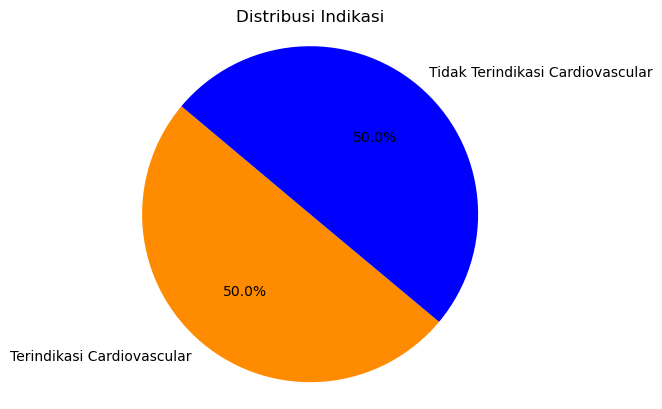

In [15]:
# Count the occurrences of each value in the 'class' column
class_counts = df_eda['cardio'].value_counts()

# Define labels for each value
labels = ['Terindikasi Cardiovascular', 'Tidak Terindikasi Cardiovascular']

# Define colors for each value
colors = ['darkorange', 'blue']

# Create the pie plot
plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribusi Indikasi')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

Dari hasil visualisasi diatas, didapatkan  bahwa pada kolom target ini nantinya balance. Karena yang terindikasi dan yang tidak terindikasi hasilnya 50:50.

### **Jumlah Pasien Yang Terindikasi Berdasarkan Gender**

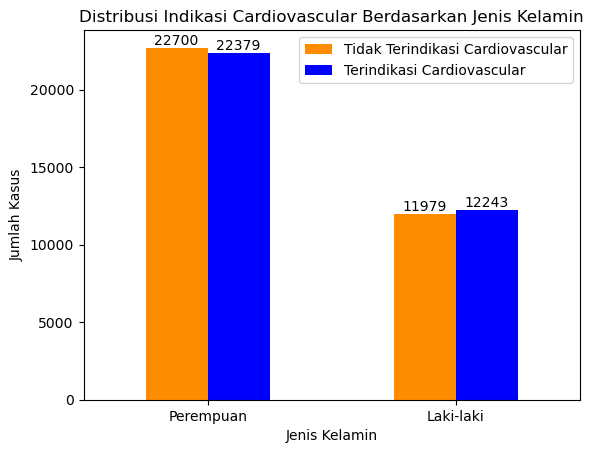

In [16]:
# Menghitung jumlah kejadian dari setiap nilai pada kolom 'class'
class_counts_by_gender = df_eda.groupby('gender')['cardio'].value_counts().unstack()

# Mendefinisikan label untuk setiap nilai gender
gender_labels = ['Perempuan', 'Laki-laki']

# Mendefinisikan warna untuk setiap nilai cardiovascular
colors = ['darkorange', 'blue']

# Membuat diagram batang
ax = class_counts_by_gender.plot(kind='bar', color=colors)

# Menambahkan label sumbu x
plt.xlabel('Jenis Kelamin')

# Menambahkan label sumbu y
plt.ylabel('Jumlah Kasus')

# Menambahkan judul
plt.title('Distribusi Indikasi Cardiovascular Berdasarkan Jenis Kelamin')

# Menambahkan legend
plt.legend(['Tidak Terindikasi Cardiovascular', 'Terindikasi Cardiovascular'], loc='upper right')

# Mengubah label x-axis dengan nama gender yang lebih deskriptif
plt.xticks(ticks=[0, 1], labels=gender_labels, rotation='horizontal')

# Menampilkan jumlah kasus di atas setiap batang
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Menampilkan plot
plt.show()


Dari perbandingan visualisasi diatas, dapat dilihat bahwa jumlah yang terindikasi kebanyakan adalah dari gender perempuan, dengan jumlah pasien yang terindikasi sebesar 22.379, dan untuk laki-laki sebesar 12.243.

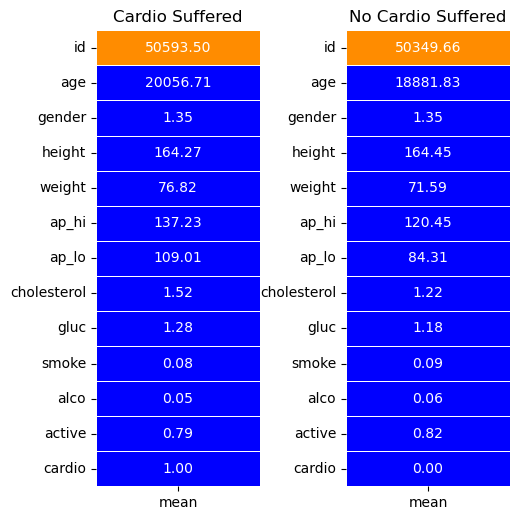

In [17]:
cardio = df_eda[df_eda['cardio'] == 1].describe().T
no_cardio = df_eda[df_eda['cardio'] == 0].describe().T

colors = ['blue', 'darkorange']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(cardio[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'white',cbar = False,fmt = '.2f')
plt.title('Cardio Suffered');

plt.subplot(1,2,2)
sns.heatmap(no_cardio[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'white',cbar = False,fmt = '.2f')
plt.title('No Cardio Suffered');

fig.tight_layout(pad = 0)

- Rata-rata usia yang terkena cardiovascular adalah 54,9 tahun, sedangkan yang tidak 51,7 tahun.
- Rata-rata Kadar ap_hi dan ap_lo juga berpengaruh untuk orang yang terindikasi cardiovascular, dapat dilihat yang terindikasi memiliki rata-rata yang lebih tinggi daripada yang tidak.
- Kadar glukosa dalam tubuh pada pasien yang terindikasi lebih tinggi daripada yang tidak terindikasi.
- Aktifitas fisik terlihat bahwa rata-rata pasien yang tidak terindikasi memiliki aktifitas fisik yang lebih tinggi daripada yang terindikasi.

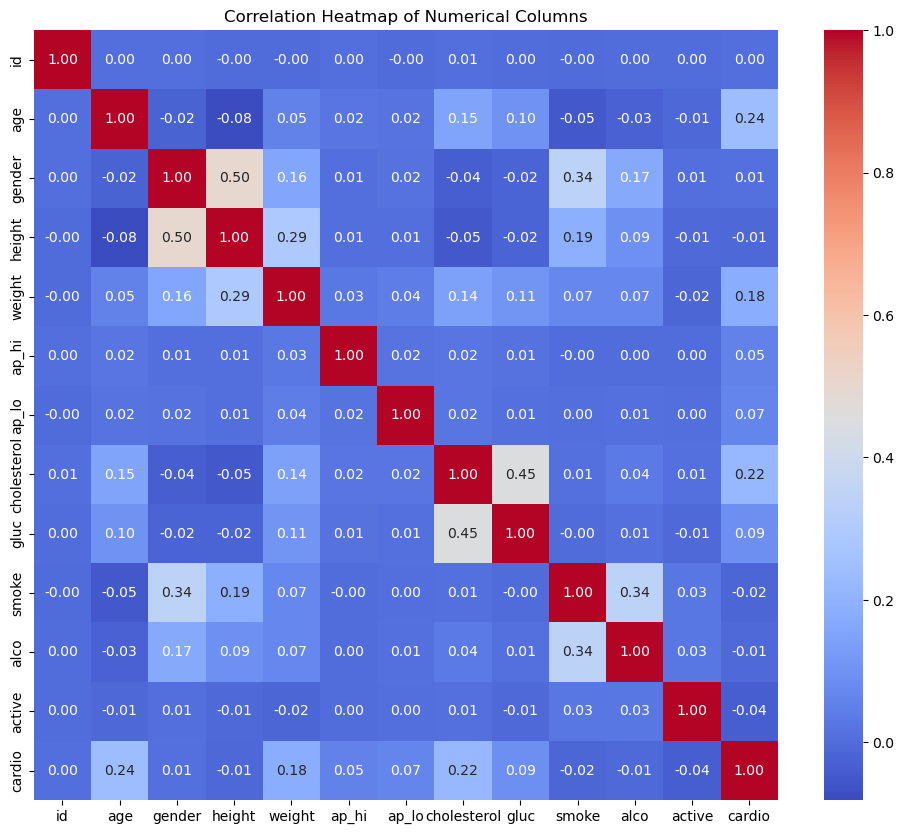

In [18]:
correlation_matrix = df_eda.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Heatmap of Numerical Columns')

# Show plot
plt.show()

Berdasarkan visualisasi diatas dapat diasumsikan bahwa: 
- Variabel yang memiliki korelasi positif cukup kuat adalah ap_hi (tekanan darah sistolik) dan ap_lo (tekanan darah diastolik), dengan nilai korelasi sekitar 0.45. Hal ini menunjukkan bahwa ketika tekanan darah sistolik meningkat, tekanan darah diastolik juga cenderung meningkat.  

- Ada korelasi moderat antara age (usia) dan cholesterol dengan nilai korelasi sekitar 0.22, yang menunjukkan bahwa seiring bertambahnya usia, kadar kolesterol cenderung meningkat.  

- Korelasi positif moderat lainnya adalah antara age dan cardio (sekitar 0.24), menunjukkan bahwa risiko penyakit kardiovaskular cenderung meningkat seiring bertambahnya usia.  

- Hubungan Lemah atau Tidak Ada Hubungan:  sebagian besar variabel lainnya memiliki korelasi yang sangat lemah atau mendekati nol, seperti gender dengan variabel lain, atau smoke dengan cardio. Ini menunjukkan bahwa tidak ada hubungan linear yang signifikan di antara variabel-variabel ini.  

- Beberapa variabel memiliki korelasi negatif yang lemah, misalnya smoke dengan height (-0.05) atau active dengan cardio (-0.04). 



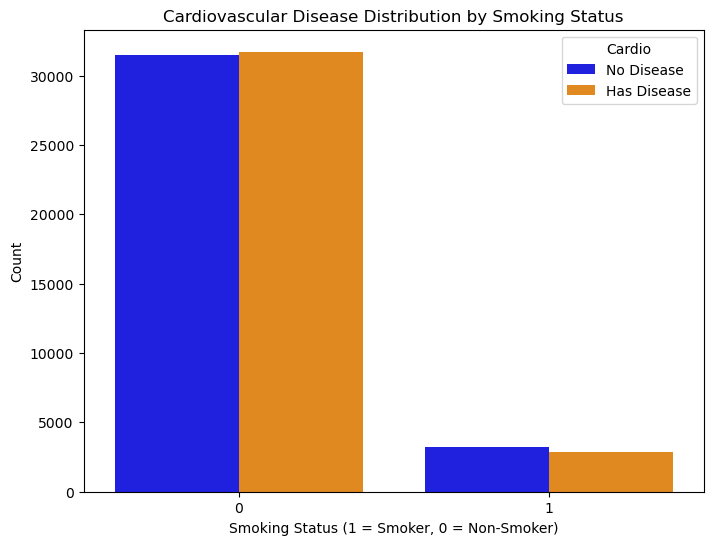

In [19]:
# Membuat plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df_eda, x='smoke', hue='cardio', palette=colors)

# Menambahkan judul dan label
plt.title('Cardiovascular Disease Distribution by Smoking Status')
plt.xlabel('Smoking Status (1 = Smoker, 0 = Non-Smoker)')
plt.ylabel('Count')
plt.legend(title='Cardio', labels=['No Disease', 'Has Disease'])

plt.show()

- Ternyata berdasarkan dataset, orang yang cenderung merokok lebih sedekit terkena cardiovascular desease, berarti merokok bukanlah faktor utama penyebab cardiovascular.

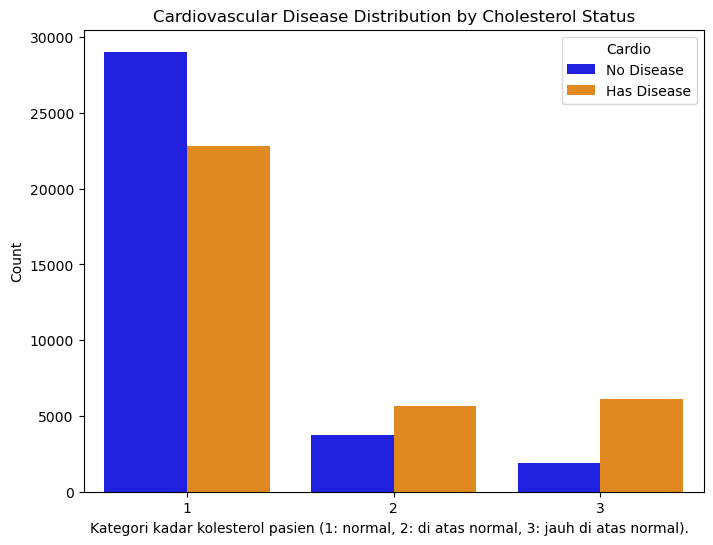

In [20]:
# Membuat plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df_eda, x='cholesterol', hue='cardio', palette=colors)

# Menambahkan judul dan label
plt.title('Cardiovascular Disease Distribution by Cholesterol Status')
plt.xlabel('Kategori kadar kolesterol pasien (1: normal, 2: di atas normal, 3: jauh di atas normal).  ')
plt.ylabel('Count')
plt.legend(title='Cardio', labels=['No Disease', 'Has Disease'])

plt.show()

Terlihat bahwa pasien dengan kadar kolesterol yang lebih tinggi (kategori 2 dan 3) cenderung memiliki angka penyakit kardiovaskular yang lebih tinggi. Kadar kolesterol yang tinggi sering dikaitkan dengan risiko penyakit jantung.

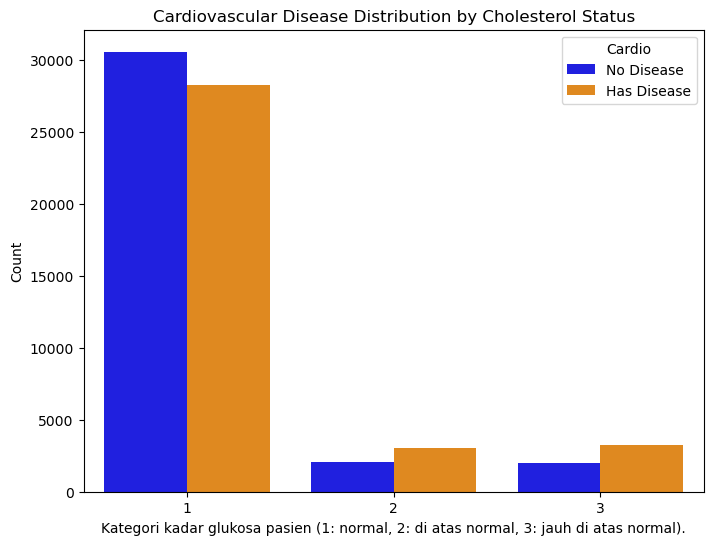

In [21]:
# Membuat plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df_eda, x='gluc', hue='cardio', palette=colors)

# Menambahkan judul dan label
plt.title('Cardiovascular Disease Distribution by Cholesterol Status')
plt.xlabel('Kategori kadar glukosa pasien (1: normal, 2: di atas normal, 3: jauh di atas normal).')
plt.ylabel('Count')
plt.legend(title='Cardio', labels=['No Disease', 'Has Disease'])

plt.show()

Dari dataset tersebut, saya berasumsi distribusi tidak make sense. Banyak pasien dengan kadar glukosa normal (kategori 1) juga memiliki penyakit kardiovaskular. Ini tampak tidak sesuai dengan kenyataan, tetapi bisa jadi ada faktor lain yang lebih dominan mempengaruhi risiko ini, seperti tekanan darah atau obesitas.

Exploratory Data Analisis sudah selesai, selanjutnya kita akan melakukan ke tahap feature engineering, namun untuk mengamankan data, kita akan buat copy data dengan menggunakan variable baru bernama ``df_eda``.

# **v. Feature Engineering**

Setelah pengecekan dari data loading dan insight dari EDA, data sudah siap di proses untuk dipersiapkan masuk ke dalam permodelan. Proses ini meliputi proses splitting, pengecekan kardinal, pengecekan outlier, pengecekan missing value, seleksi fitur, scalling, dan juga encoding.

In [22]:
df_febaru = df.sample(1, random_state=0)# 

In [23]:
# Save point data loading sebelum feature engineering
df_fe = pd.DataFrame(df)

### **Split X(features) and Y(target)**

Selanjutnya kita akan split dataframe menjadi kolom X(feature) dan Y(Target)

In [24]:
# Filter X for just features and y is label for classification
X = df_fe.drop(columns=['cardio'])
y = df_fe[['cardio']]

In [25]:
# Split data train and data test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Check the shape of data
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)

X_train shape =  (55440, 12)
X_test shape =  (13861, 12)


- Spltting dilakukan dengan pembagian data sebanyak 80% untuk data train dan 20% data untuk data test
- Data pada X_train sebesar 55440
- Data pada X_test sebesar 13861

### **Check missing value X dan Y**

In [26]:
# Check missing value in X_train
print('Null pada X_train : ', X_train.isnull().sum().sum())

Null pada X_train :  0


In [27]:
# check missing value in y_train
print('Null pada y_train :\n',y_train.isnull().sum())

Null pada y_train :
 cardio    0
dtype: int64


- Tidak terdapat missing value pada semua variabel
- Proses akan dilanjutkan ke handling dari outlier

### **Handling Outlier**

### **Check Skewness**

In [28]:
def check_skew(X_train):
    # Menfilter kolom numerik
    numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

    # Membuat list untuk kolom dengan distribusi normal, skew, highly skew, dan keseluruhannya  
    normal_columns = []
    skewed_columns = []
    highly_skewed_columns = []
    all_columns = []

    # Iterasi kolom numerik untuk mengetahui distirbusi tiap kolom
    for column in numerical_columns:
        skewness = X_train[column].skew()

        # Jika data distribusi normal
        if -0.5 <= skewness <= 0.5:
            normal_columns.append([column, skewness])
            all_columns.append([column,skewness,'Normal'])

        # Jika data skew
        elif -1 <= skewness < -0.5 or 0.5 > skewness >= 1 :
            skewed_columns.append([column, skewness,])
            all_columns.append([column,skewness,'SKEWED'])


        elif skewness <= -1 or skewness >= 1:
            highly_skewed_columns.append([column, skewness])
            all_columns.append([column,skewness,'HIHGLY SKEWED'])


    # Membuat dataframe dari list 
    normal_X_train = pd.DataFrame(normal_columns, columns=['Column', 'Skewness'])
    skewed_X_train = pd.DataFrame(skewed_columns, columns=['Column', 'Skewness'])
    highly_skewed_X_train = pd.DataFrame(highly_skewed_columns, columns=['Column', 'Skewness'])
    all_skewed_X_train = pd.DataFrame(all_columns, columns=['Column', 'Skewness', 'Distribution'])


    return normal_X_train, skewed_X_train, highly_skewed_X_train, all_skewed_X_train

In [29]:
normal_X_train, skewed_X_train, highly_skewed_X_train, all_skewed_X_train = check_skew(X_train)

print("Normal Distribution:")
print(normal_X_train)

print("\nSkewed Distribution:")
print(skewed_X_train)

print("\nhighly Skewed Distribution:")
print(highly_skewed_X_train)

Normal Distribution:
  Column  Skewness
0    age -0.305159

Skewed Distribution:
   Column  Skewness
0  height -0.675335

highly Skewed Distribution:
   Column   Skewness
0  weight   1.018208
1   ap_hi  91.873173
2   ap_lo  32.243465


In [30]:
all_skewed_X_train

,Column,Skewness,Distribution
0,age,-0.305159,Normal
1,height,-0.675335,SKEWED
2,weight,1.018208,HIHGLY SKEWED
3,ap_hi,91.873173,HIHGLY SKEWED
4,ap_lo,32.243465,HIHGLY SKEWED


- Kolom yang termasuk distribusi normal adalah kolom ``age`` 
- Kolom yang termasuk distribusi skew adalah ``height``
- Kolom yang termasuk distribusi highly skew adalah ``weight``
- Ternyata, dapat kita lihat bahwa ``ap_hi`` dan ``ap_lo`` termasuk ke golongan distribusi yang EXTREME skewnessnya, jadi kita akan handle dengan iqr dengan fold=3

In [31]:
# Fungsi visualisasi histogram dan boxplot tiap kolom numerik
def diagnostic_plots(X_train):
    # memilih kolom numerik
    numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
    
    # iterasi tiap kolom numerik
    for column in numerical_columns:
        # Define figure size
        plt.figure(figsize=(16, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(X_train[column], bins=30, color='blue')
        plt.title(f'Histogram of {column}')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=X_train[column], color='darkorange')
        plt.title(f'Boxplot of {column}')

        plt.show()

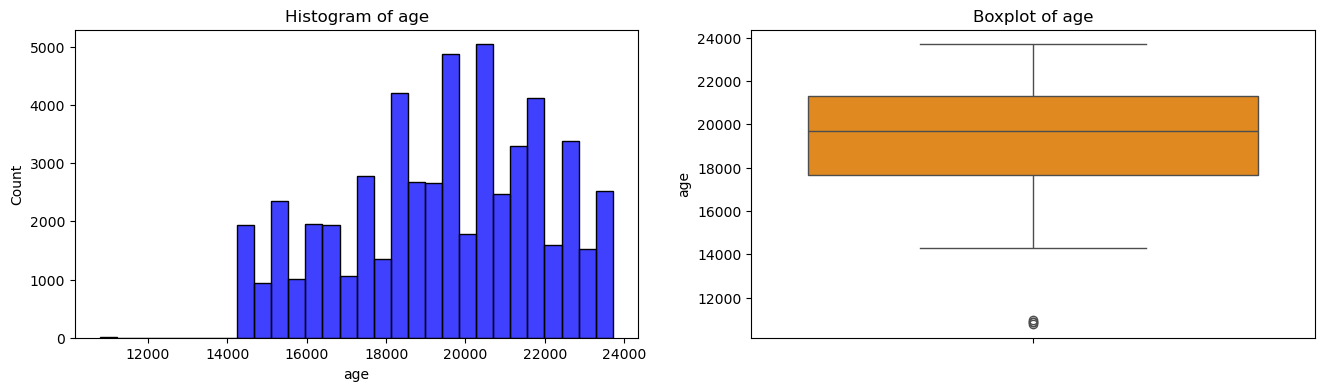

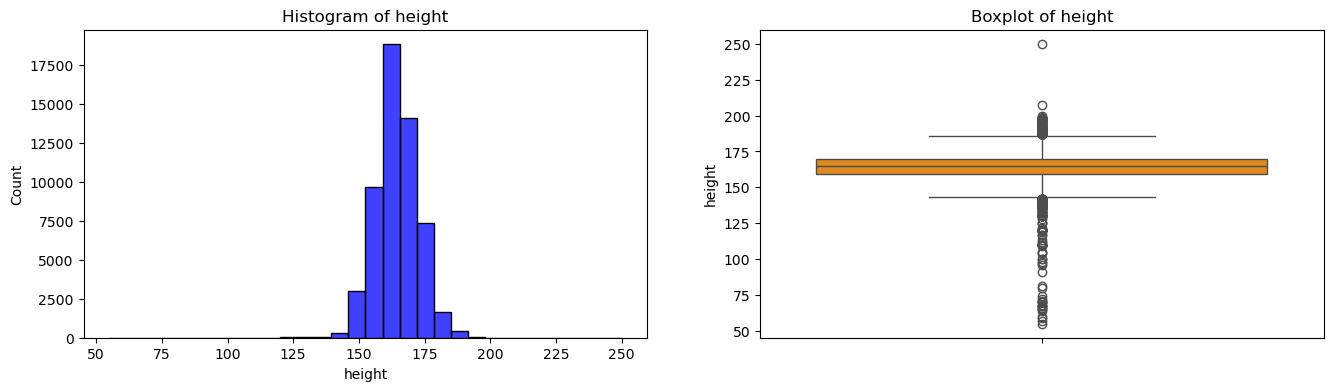

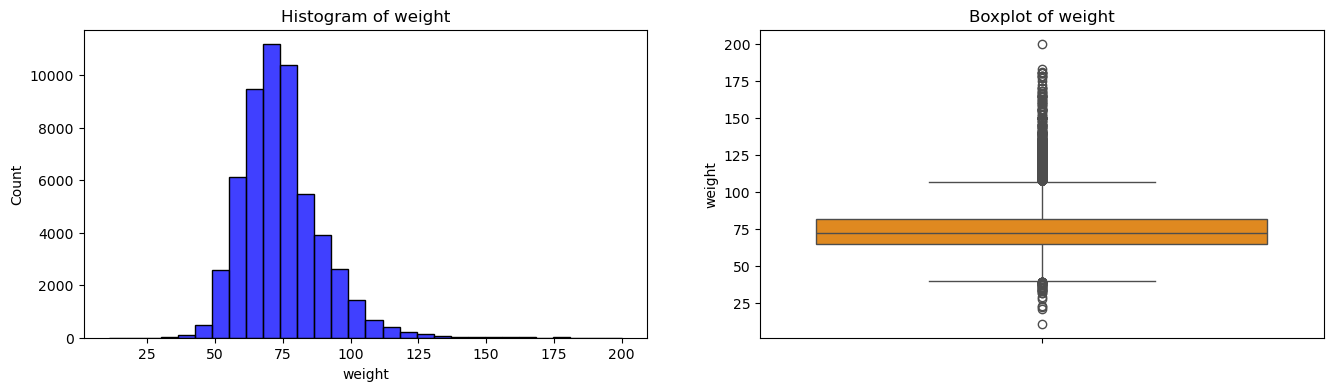

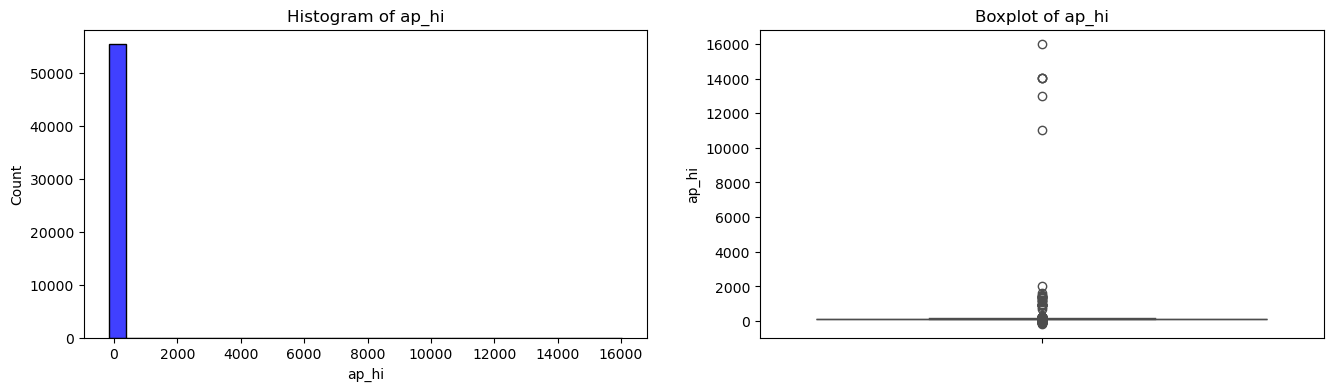

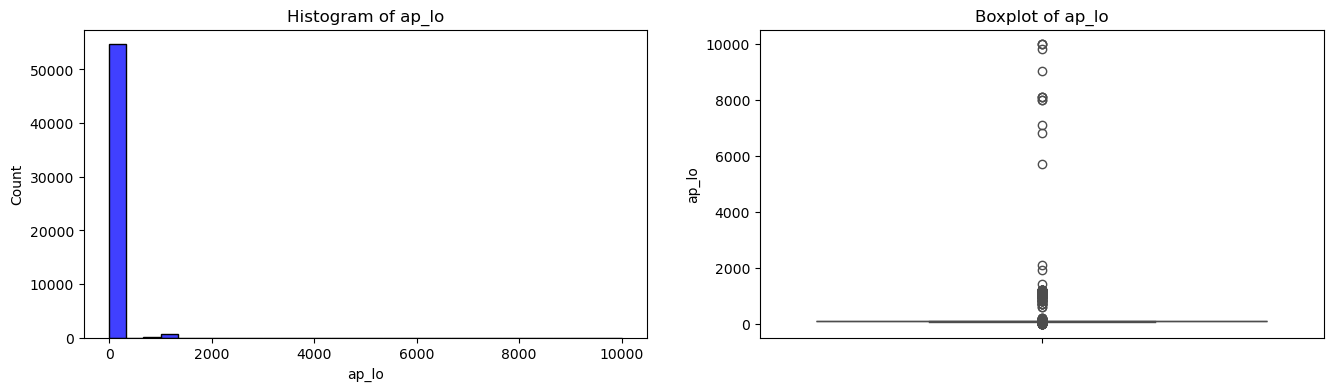

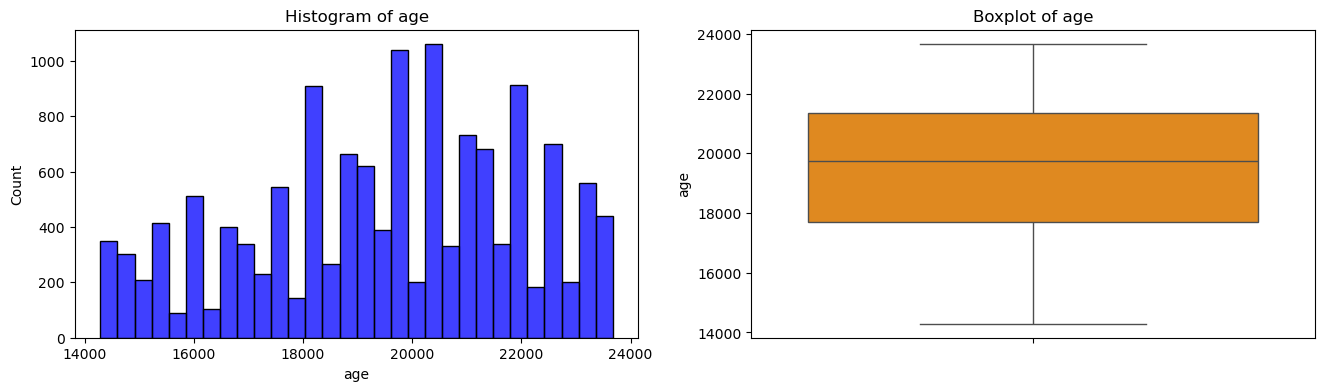

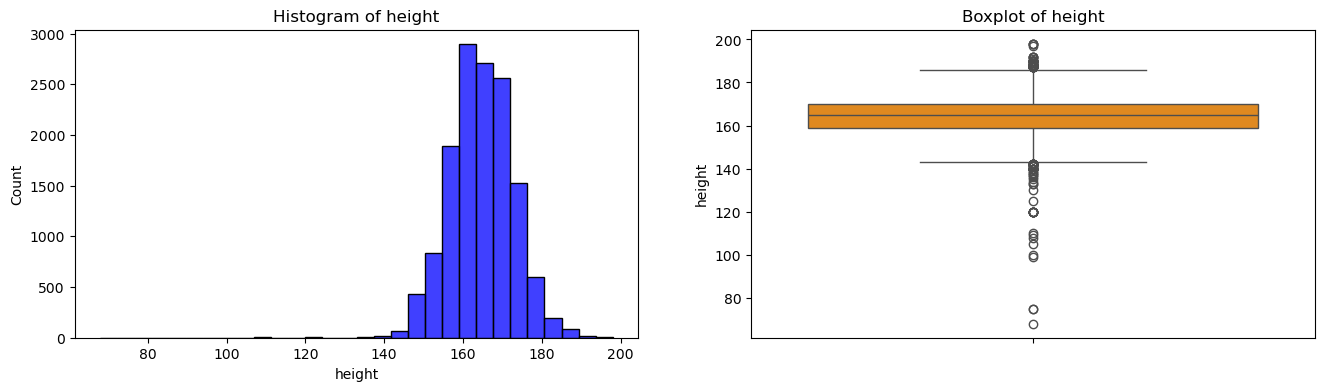

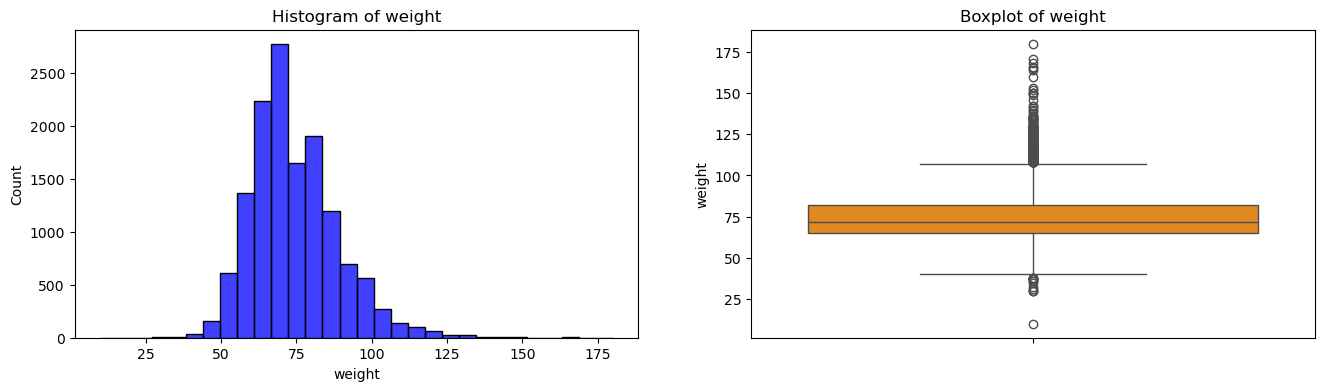

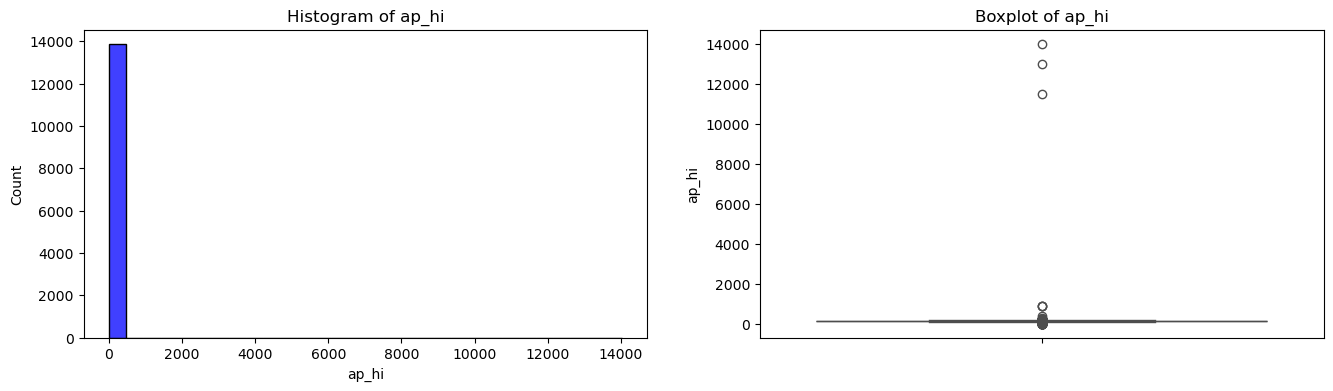

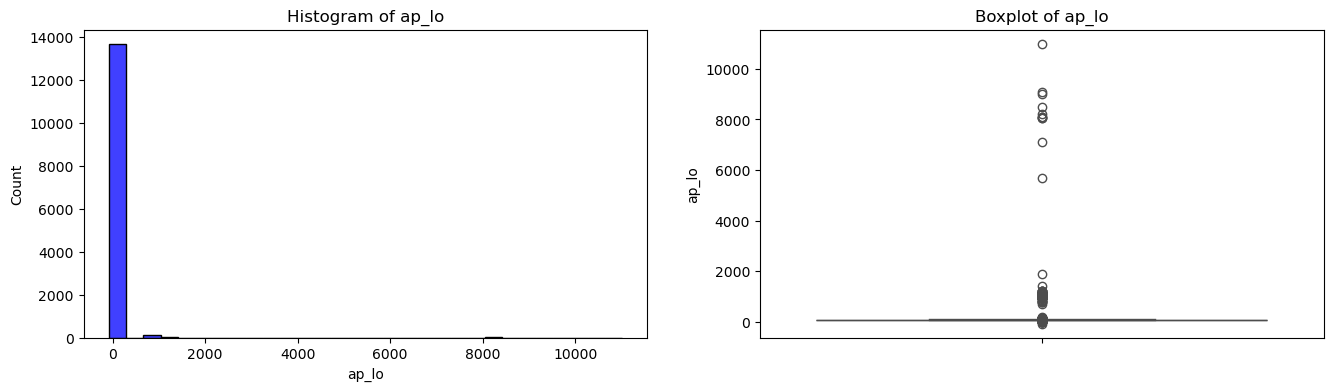

In [32]:
# Fungsi untuk X_train
diagnostic_plots(X_train)

# Fungsi untuk X_test
diagnostic_plots(X_test)

In [33]:
# Pembuatan variabel kolom skew dan kolom normal untuk mempermudah capping
kolom_skew = skewed_X_train['Column'].tolist() + highly_skewed_X_train['Column'].tolist()
kolom_normal = normal_X_train['Column'].tolist()

### **Capped Skew Normal**

In [34]:
# Capping untuk data dengan distribusi normal 
winsoriser_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=kolom_normal)

X_train_capped = winsoriser_normal.fit_transform(X_train)

### **Capped Skew High and Extreme**

In [35]:
# Capping untuk data dengan distribusi skewed
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables = kolom_skew)

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

In [36]:
# Plot Komparasi distribusi
def outlier_handling_plot_comparison(df_before, df_after, variable):
    # Ukuran dan title 
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='blue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='darkorange')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='blue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='darkorange')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

### **Check Normal Distribution after Handling Outlier**

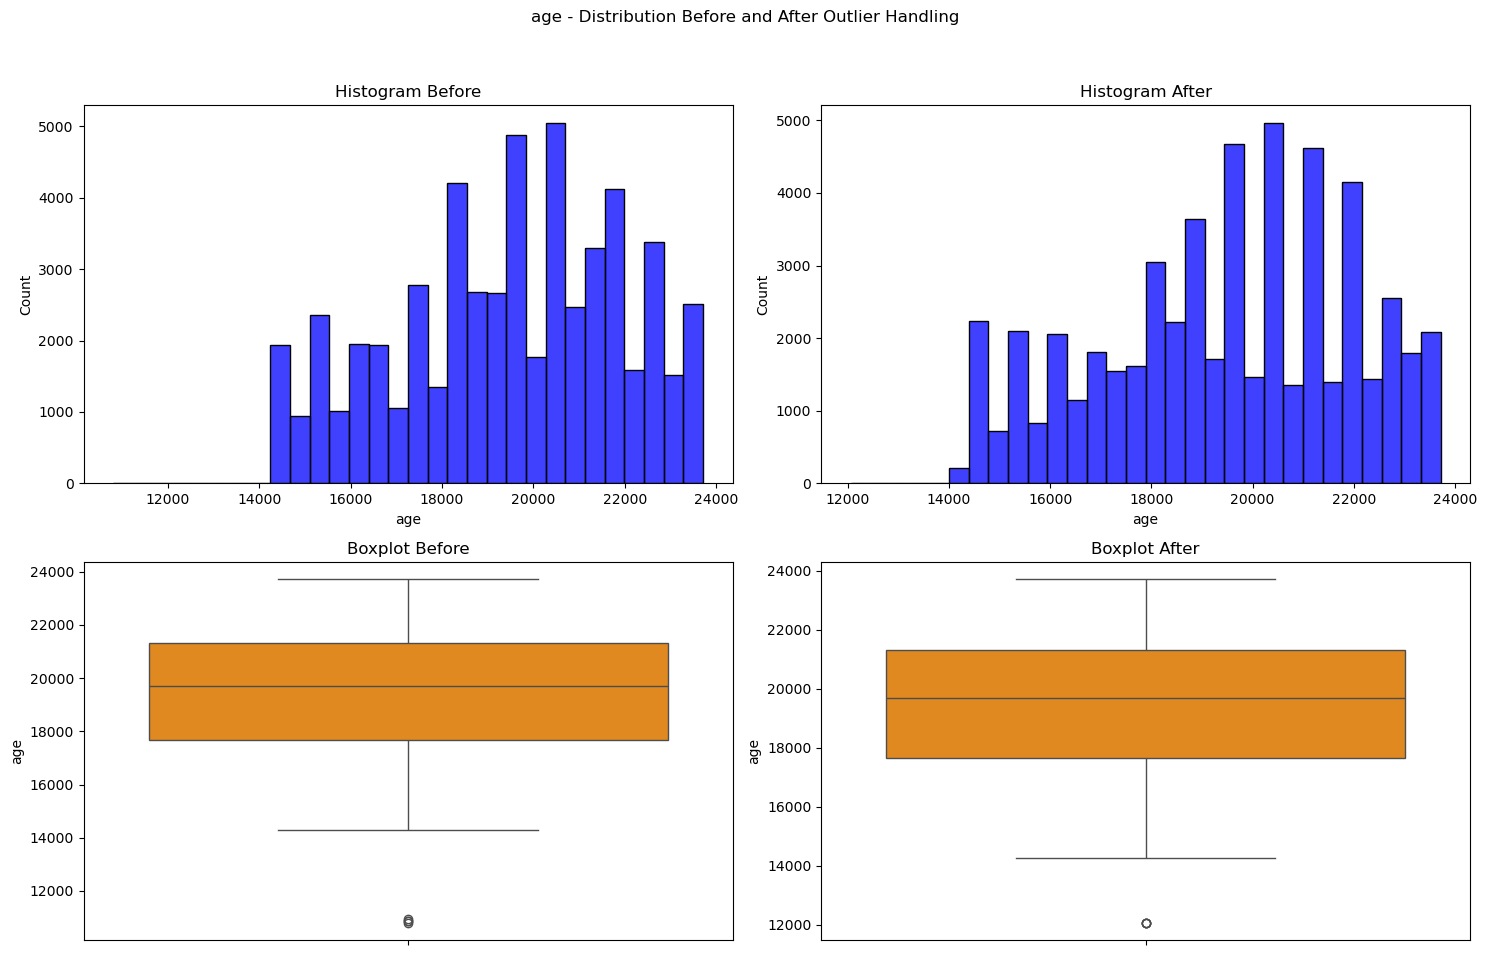

In [37]:
# Pengelompokkan data x_train yang berdistribusi normal
X_train_normal = X_train[kolom_normal]
# Menggunakan fungsi looping
for col in X_train_normal.select_dtypes(include=np.number).columns.to_list():
    outlier_handling_plot_comparison(X_train_normal, X_train_capped, col)

Pada visualisasi diatas, dapat dilihat bahwa handle outlier berpengaruh sedikit untuk penghapusan outlier yang skewnya normal.

### **Check Column Skew that High Skew and Extreme Skew after Handling Outlier**

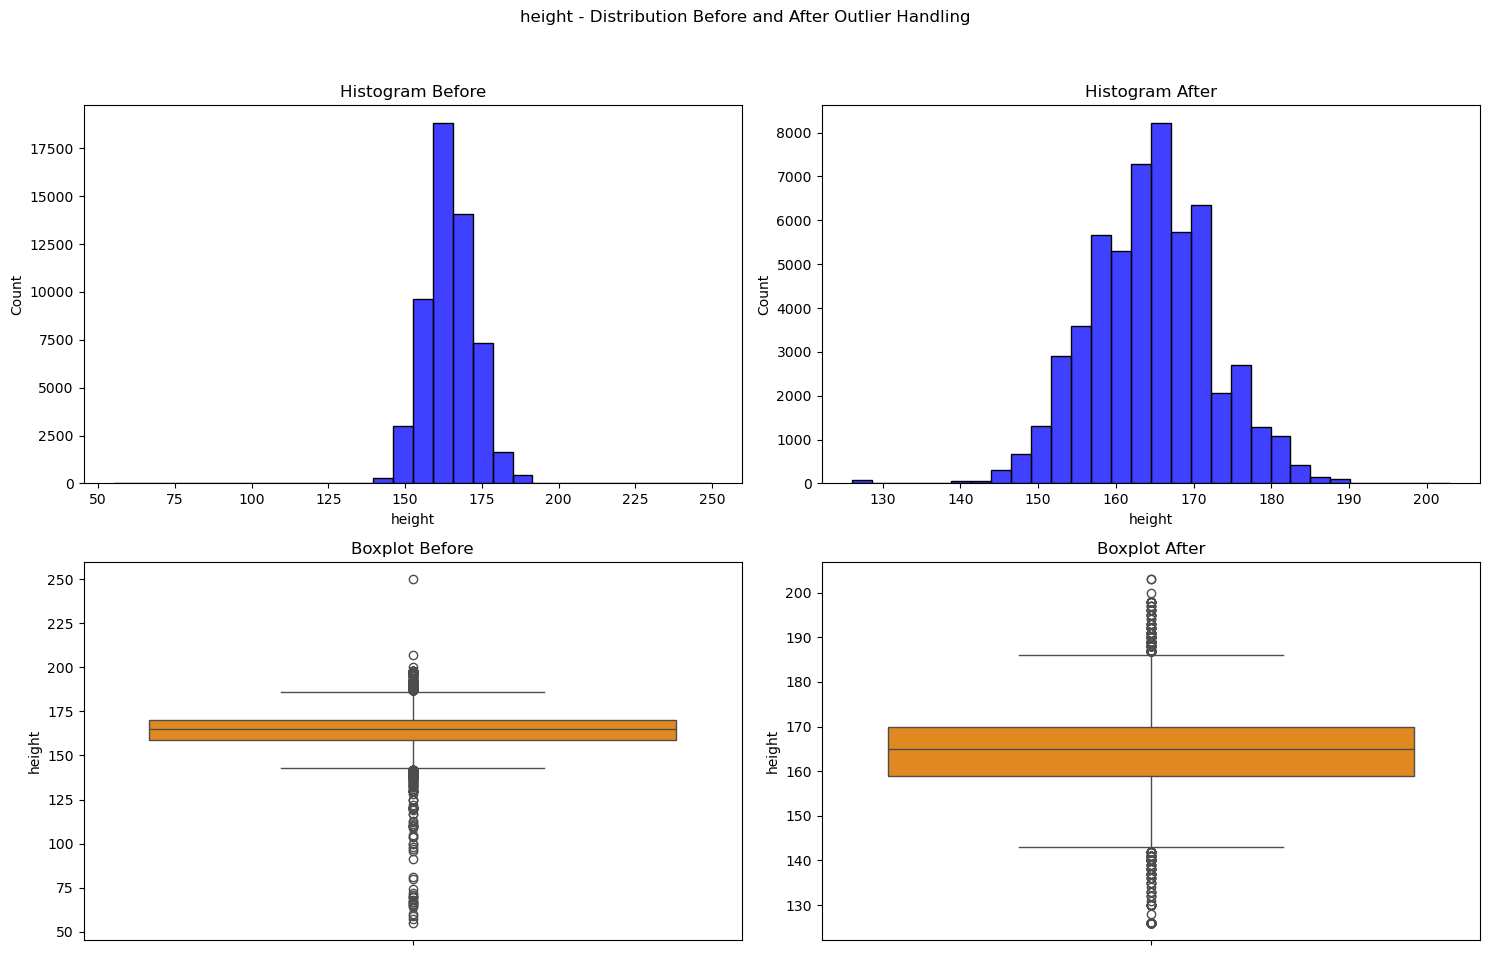

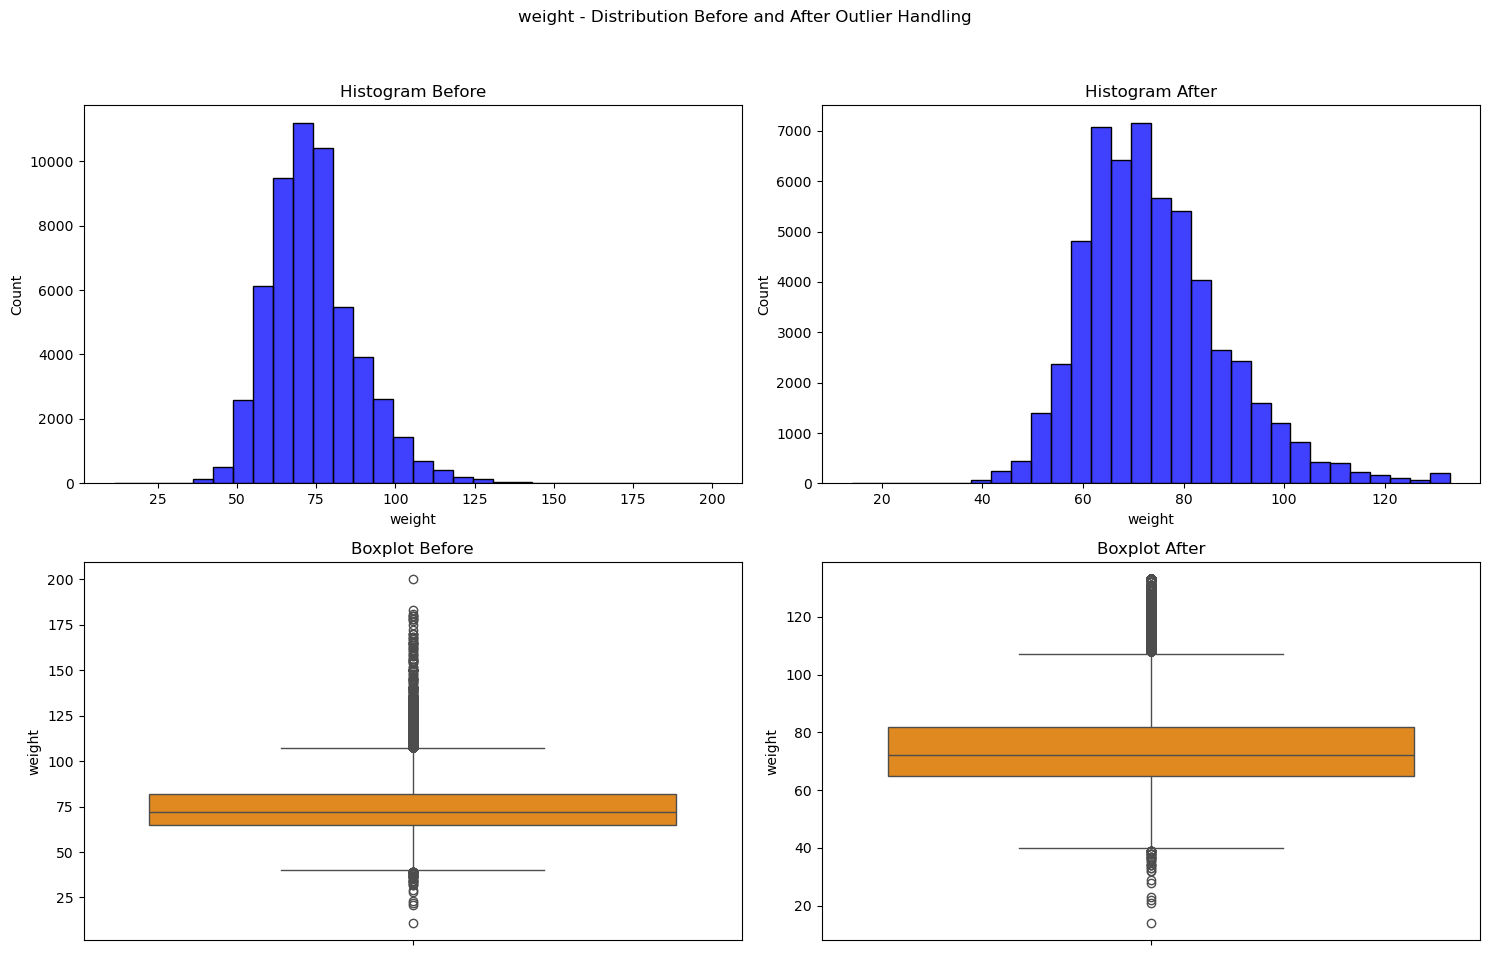

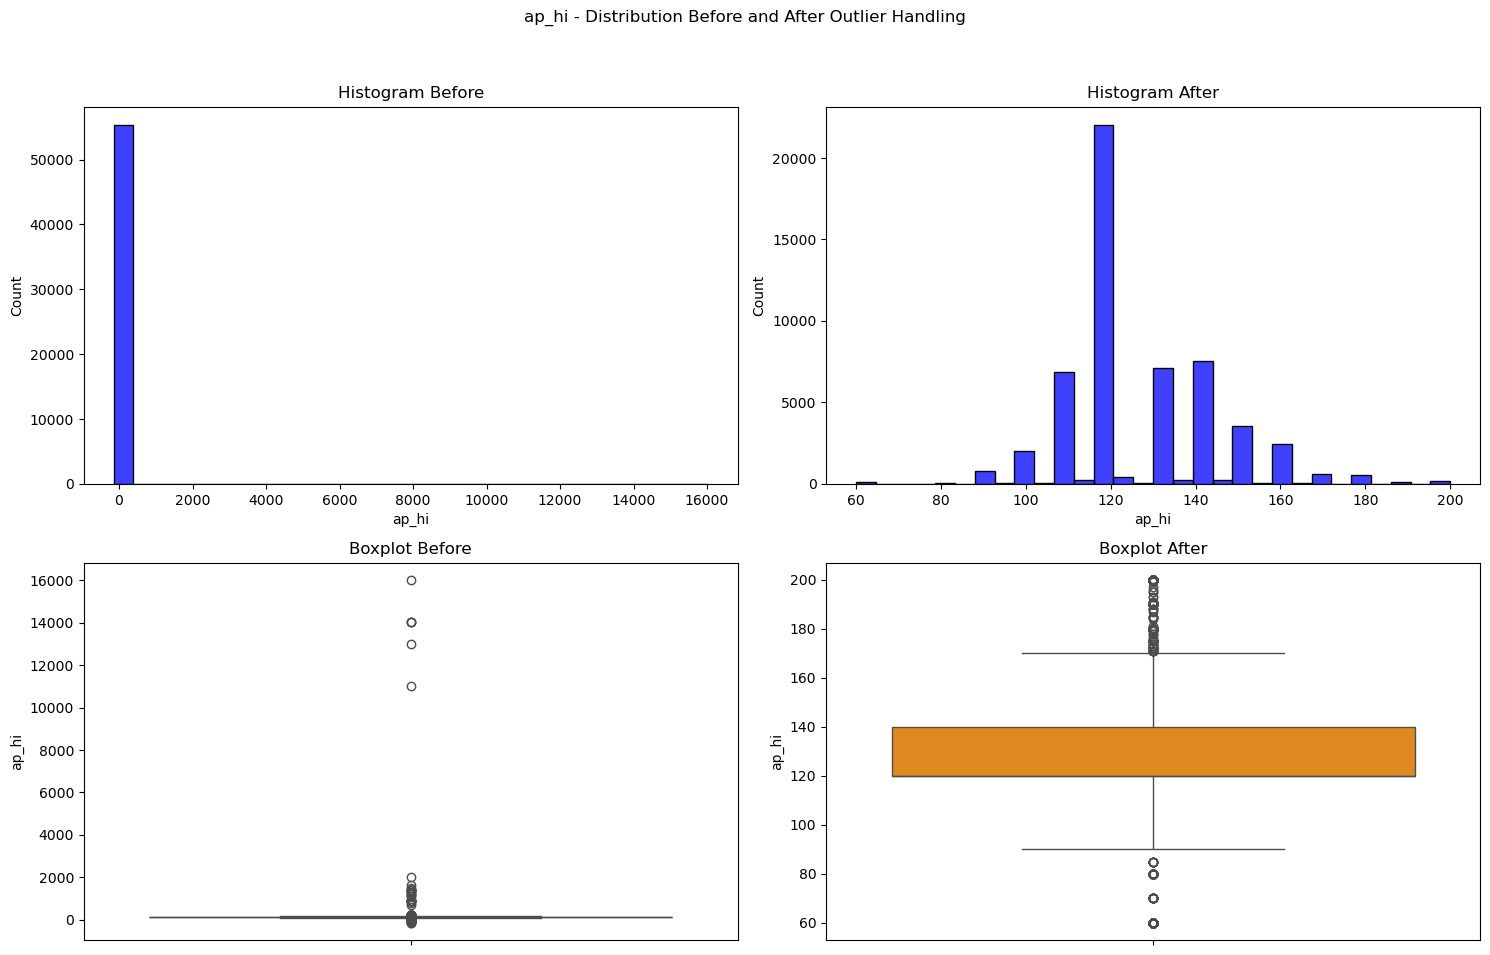

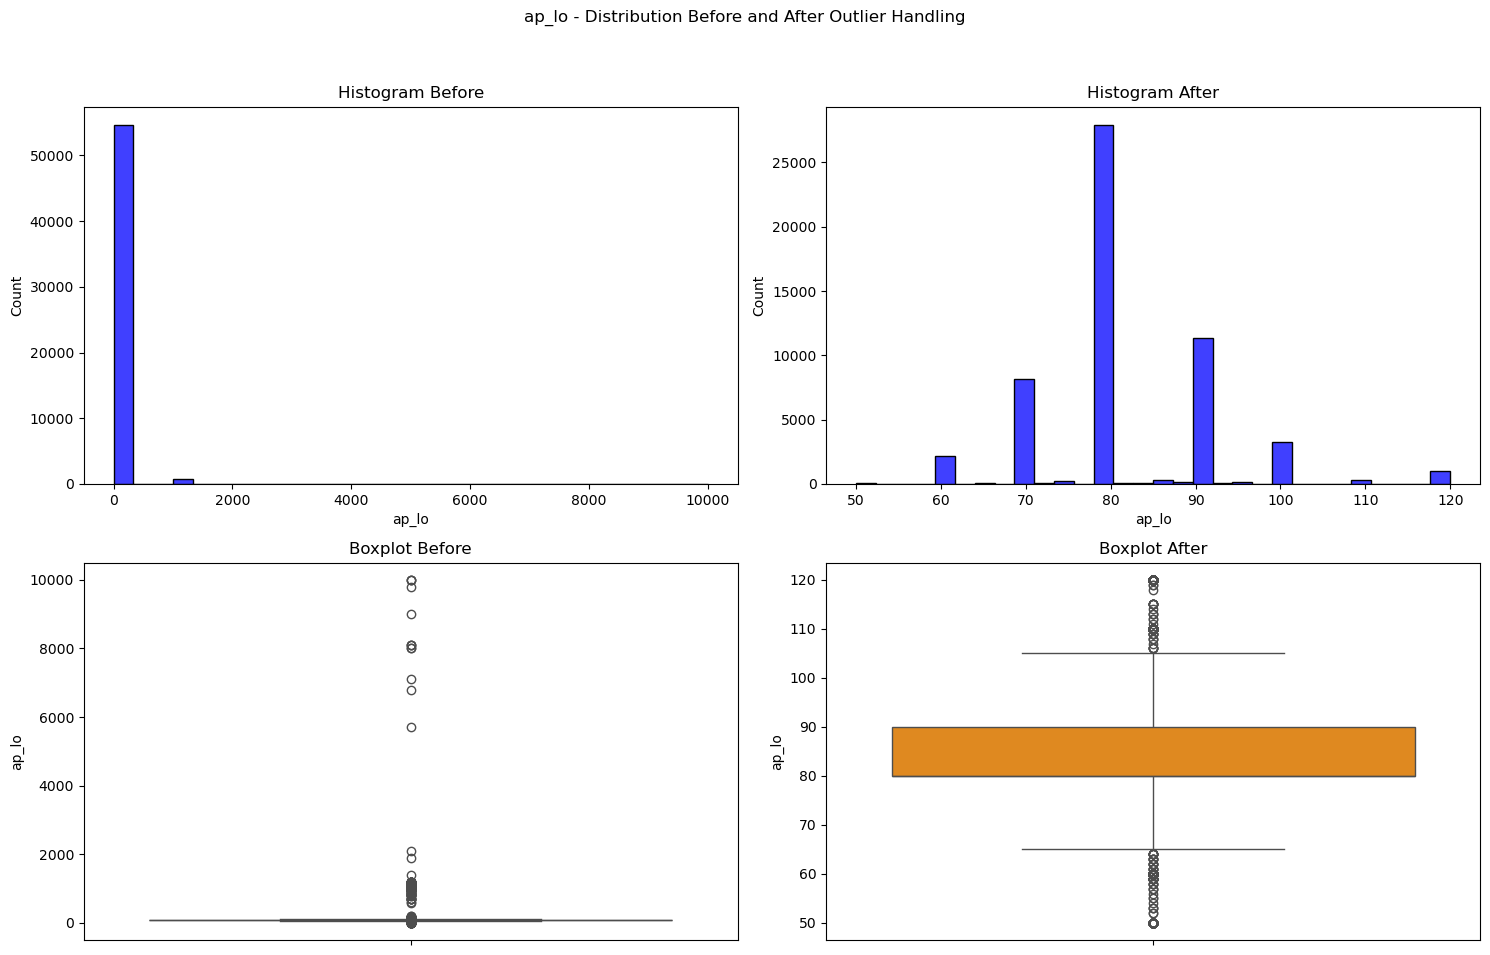

In [38]:
# Pengelompokkan data x_train yang berdistribusi skew
X_train_skew = X_train[kolom_skew]
# Menggunakan fungsi looping
for col in X_train_skew.select_dtypes(include=np.number).columns.to_list():
    outlier_handling_plot_comparison(X_train_skew, X_train_capped, col)

- Setelah dilakukan handling outlier, dapat dilihat sebaran data lebih baik dan outlier berkurang
- Selanjutnya akan dilanjutkan ke tahap splitting data.

### **Feature Selection**

Pada tahapan feature selection ini, kita akan menentukan kolom mana yang sekiranya berkaitan dengan kolom target kita, yaitu ```cardio```.

In [39]:
# Add column y_train to X_train for check features correlation with label 
X_train_capped_corr = pd.concat([X_train_capped,y_train],axis=1)

In [40]:
# Check correlation between my features and label so i can assume my own threshold corr value for feature selection
X_train_capped_corr.phik_matrix()['cardio']

interval columns not set, guessing: ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


id             0.009852
age            0.312021
gender         0.006069
height         0.031411
weight         0.238717
ap_hi          0.585893
ap_lo          0.481602
cholesterol    0.134049
gluc           0.055039
smoke          0.025120
alco           0.014531
active         0.054617
cardio         1.000000
Name: cardio, dtype: float64

Berdasarkan hasil uji korelasi dengan menggunakan phik, saya akan menentukan treshold yang akan saya gunakan sebesar 0.05. Jadi saya akan menghapus kolom ``id``, ``gender``, ``height``, karena menurut saya, walaupun kolom smoke dan alco korelasinya melewati treshold saya, dalam dunia kesehatan, kadar glukosa, merokok dan konsumsi alcohol itu memiliki pengaruh terhadap resiko cardiovascular. Dibahas dalam jurnal berikut :
1. Merokok dan alkohol : https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1003410  

    Pada jurnal itu, disebutkan bahwa "elevated blood glucose levels are associated with an increased risk of cardiovascular diseases (CVD). Several studies have shown that high fasting blood glucose concentrations and elevated glycated hemoglobin (HbA1c) levels are linked to a higher likelihood of developing conditions such as coronary heart disease and stroke." 

2. Kadar Glukosa : https://diabetesjournals.org/care/article/27/12/2836/26429/Blood-Glucose-and-Risk-of-Cardiovascular-Disease   

    Pada jurnal tersebut dijelaskan bahwa "smoking and alcohol consumption are significant risk factors for cardiovascular diseases (CVD). Research indicates that smoking is linked to an increased risk of various CVDs, such as stroke, myocardial infarction, and coronary heart disease."

### **Delete Column that has not correlation according to treshold**

Dalam tahap ini, saya akan menghapus kolom yang tidak kita gunakan di ```X_train_capped``` dan juga ```X_test```.

In [41]:
#delete di X_train_capped
X_train_capped.drop(['id', 'gender', 'height'], axis=1, inplace=True)

#delete di X_test
X_test.drop(['id', 'gender', 'height'], axis=1, inplace=True)

### **Split data to cat_cols, ordinal_cols, and num_cols**

Pada tahap split kita akan membagi kolom feature yang kita gunakan ke tipe kolom seharusnya.

In [42]:
# Pengelompokkan untuk kolom numerikal dan kolom categorical
cat_columns = ['smoke', 'alco', 'active']

#kelompok ordinal columns
ordinal_columns = ['cholesterol', 'gluc']

#kelompok numerical columns
num_columns = ['age', 'weight', 'ap_hi', 'ap_lo']

#print 
print('Categorical Columns: ', cat_columns)
print('Ordinal Columns: ', ordinal_columns)
print('Numcerical Columns: ', num_columns)

Categorical Columns:  ['smoke', 'alco', 'active']
Ordinal Columns:  ['cholesterol', 'gluc']
Numcerical Columns:  ['age', 'weight', 'ap_hi', 'ap_lo']


Dari pengkategorian tersebut kita memilih dari kolom-kolom feature sesuai tipe datanya yaitu :  

- Categorical Columns:  ['smoke', 'alco', 'active']  

- Ordinal Columns:  ['cholesterol', 'gluc']  

- Numerical Columns:  ['age', 'weight', 'ap_hi', 'ap_lo']  

Kemudian, kita akan melakukan scalling pada data yang numerical. Setelah kita tentukan data yang numerical diatas, kita pastikan dulu skewnessnya.

In [43]:
#Check apakah kolom fitur ada yang skew?
print('Distribution of column `age` : ', X_train_capped['age'].skew())
print('Distribution of column `weight` : ', X_train_capped['weight'].skew())
print('Distribution of column `ap_hi` : ', X_train_capped['ap_hi'].skew())
print('Distribution of column `ap_lo` : ', X_train_capped['ap_lo'].skew())

Distribution of column `age` :  -0.3042747560362566
Distribution of column `weight` :  0.8398626438875869
Distribution of column `ap_hi` :  0.7144589818558386
Distribution of column `ap_lo` :  0.7632872115567317


Berdasarkan hasil distribusi skewness, kita dapat melihat bahwa kolom `age`, `weight`, `ap_hi`, dan `ap_lo` memiliki skewness yang di bawah 1%. Kita akan menganggap karena kurang dari 1% data sudah normal. Jadi kita akan menggunakan Standard Scaler. Pada tahapan ini, saya tidak melakukan encode, karena dataset untuk kolom categorical sudah berbentuk valuenya sudah berbentuk urut, 0 dan 1, dan 1,2,3. Jadi kita hanya akan melakukan scaling pada kolom numerical. 

### **Column Transformer**

In [44]:
# Buat Column Transformer

num_pipeline = StandardScaler()

ct = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns)
], remainder='passthrough')

ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_num', StandardScaler(),
                                 ['age', 'weight', 'ap_hi', 'ap_lo'])])

# **vi. Model Definition**

Pada report kali ini, ada beberapa pilihan model yang akan saya gunakan. Akan dilakukan pendefinisian model dan mencari best model setelah dilakukan cross validation. Berikut penjelasan singkat beberapa model yang akan menjadi opsi untuk digunakan:

1. Random Forest adalah algoritma ensemble yang terdiri dari sejumlah besar pohon keputusan yang bekerja secara kolektif untuk menghasilkan prediksi yang lebih baik. Setiap pohon dalam ensemble dibangun secara acak menggunakan sampel bootstrap dari data pelatihan, dan prediksi akhir adalah hasil dari agregasi prediksi semua pohon. Pada model ini, hyperparameter yang akan digunakan adalah sebagai berikut:

    - N_estimators: Jumlah pohon dalam ensemble.
    - Criterion: Kriteria untuk mengukur kualitas split.
    - Max Depth: Kedalaman maksimum dari setiap pohon.
    - Min Samples Split: Jumlah sampel minimum yang diperlukan untuk membagi node internal.
    - Min Samples Leaf: Jumlah sampel minimum yang diperlukan untuk menjadi leaf node  

2. SVM adalah sebuah logaritma yang efektif dalam ruang fitur berdimensi tinggi dan menangani data yang tidak linier dengan baik menggunakan fungsi kernel, serta memiliki parameter penalti yang dapat disesuaikan untuk fleksibilitas dalam menangani data yang bervariasi. Algoritma ini memiliki beberapa hyperparameter seperti:

    - C = invers dari kekuatan regulasi
    - Kernel = Kernel yang digunakan pada SVC  

3. KNN merupakan sebuah algoritma yang sederhana dan mudah dipahami, cocok sebagai baseline dalam pemodelan, non-parametrik sehingga tidak terbatas pada distribusi tertentu, dan dapat digunakan tanpa proses pelatihan, membuat algoritma ini cepat dan cocok untuk pembaruan data teratur. Model ini memiliki beberapa hyperparameter sebagai berikut :

    - n_neighbors = Jumlah n-neighbour
    - p = jarak antar poin data
    - weights = berat tiap neighbour untuk membuat prediksi  

4. Decision Tree adalah model yang kuat dan mudah diinterpretasi yang membagi ruang fitur berdasarkan aturan keputusan yang dibangun dari data pelatihan. Model ini cocok untuk pemrosesan data kategorikal dan numerik, serta dapat menangani masalah klasifikasi dan regresi. Decision Tree Classifier memiliki hyperparameter sebagai berikut:

    - Max Depth: Kedalaman maksimum dari pohon
    - Min Samples Split: Jumlah sampel minimum yang diperlukan untuk membagi node internal
    - Min Samples Leaf: Jumlah sampel minimum yang diperlukan untuk menjadi leaf node  

5. XGBoost (eXtreme Gradient Boosting) adalah algoritma ensemble yang kuat yang umumnya mengungguli banyak metode lain dalam kompetisi pemodelan dan prediksi. Berikut adalah template untuk menggunakan XGBoost Classifier dengan beberapa hyperparameter kunci:

    - N_estimators: Jumlah model pohon yang akan dibangun.
    - Max Depth: Kedalaman maksimum dari setiap pohon.
    - Learning Rate: Tingkat pembelajaran untuk menyesuaikan bobot setiap langkah.
    - Subsample: Fraksi dari sampel pelatihan yang akan digunakan untuk melatih setiap pohon.
    - Colsample Bytree: Fraksi dari fitur yang akan digunakan untuk melatih setiap pohon.

Pada tahap model, saya akan menggunakan metrix Recall. Karena ingin meminimalisir False Negative, dimana sebenarnya terindikasi cardiovascular, akan tetapi tidak terindikasi.

# **vii. Model Training**

### **Cross Validation Pipeline**

Pada tahapan ini, kita akan melakukan pembuatan pipeline dan cross validation untuk mengetahui dari model SVM, Decision Tree, Random Forest, KNN, XGB.

In [45]:
#SVM model
pipe_svc = make_pipeline(ct,SVC())
cv_svm_model = cross_val_score(pipe_svc, X_train_capped, y_train, cv = 5, scoring='recall', n_jobs=-1)

#Decision Tree Model
pipe_dt = make_pipeline(ct,DecisionTreeClassifier())
cv_dt_model = cross_val_score(pipe_dt, X_train_capped, y_train, cv = 5, scoring='recall', n_jobs=-1)

#Random Forest Model
pipe_rf = make_pipeline(ct,RandomForestClassifier())
cv_rf_model = cross_val_score(pipe_rf, X_train_capped, y_train, cv = 5, scoring='recall', n_jobs=-1)

#K-Nearest Neighbors Model
pipe_knn = make_pipeline(ct,KNeighborsClassifier())
cv_knn_model = cross_val_score(pipe_knn, X_train_capped, y_train, cv = 5, scoring='recall', n_jobs=-1)

#XGBoost Model
pipe_xgb = make_pipeline(ct,XGBClassifier())
cv_xgb_model = cross_val_score(pipe_xgb, X_train_capped, y_train, cv = 5, scoring='recall', n_jobs=-1)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

### **Find Best Model**

In [46]:
# looping to find best model based on cross validation before
name_model = []
cv_score = 0
for cv,name in zip([cv_rf_model, cv_knn_model, cv_svm_model, cv_dt_model, cv_xgb_model],
                   ['Random Forest','KNN','SVC','Decision Tree','XGBOOST']):
    print(name)
    print(f'recall - All - Cross Validation : {cv}')
    print(f'recall - Mean - Cross Validation : {cv.mean()}')
    print(f'recall - Std - Cross Validation : {cv.std()}')
    print(f'recall - Range - Cross Validation : {cv.mean()-cv.std()} - {cv.mean()+cv.std()}')
    print('-'*70)
    if cv.mean() > cv_score:
        cv_score = cv.mean()
        best_model = name
    else:
      pass
print(f'Cross Validation mean from  : {cv_score}')
print(f'Best Model : {best_model}')

Random Forest
recall - All - Cross Validation : [0.69981949 0.69416862 0.69922369 0.70030691 0.70211229]
recall - Mean - Cross Validation : 0.699126202581889
recall - Std - Cross Validation : 0.0026600219510537087
recall - Range - Cross Validation : 0.6964661806308352 - 0.7017862245329427
----------------------------------------------------------------------
KNN
recall - All - Cross Validation : [0.69855596 0.69362701 0.698321   0.69561293 0.68893302]
recall - Mean - Cross Validation : 0.6950099817311184
recall - Std - Cross Validation : 0.00354238264503791
recall - Range - Cross Validation : 0.6914675990860805 - 0.6985523643761563
----------------------------------------------------------------------
SVC
recall - All - Cross Validation : [0.68212996 0.67485106 0.67828128 0.68423903 0.67394837]
recall - Mean - Cross Validation : 0.6786899393405343
recall - Std - Cross Validation : 0.004000318647513654
recall - Range - Cross Validation : 0.6746896206930207 - 0.6826902579880479
---------

Dari hasil yang didapat, model terbaik setelah dilakukan cross validation adalah Random Forest, dengan rata-rata 0.70

### **Model Random Forest Before Hyperparameter Tuning**

In [47]:
#deklarasi model with pipeline RF
model_rf = make_pipeline(ct, RandomForestClassifier())
model_rf.fit(X_train_capped,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num', StandardScaler(),
                                                  ['age', 'weight', 'ap_hi',
                                                   'ap_lo'])])),
                ('randomforestclassifier', RandomForestClassifier())])

### **Model Evaluation Before Hyperparameter Tuning**

In [48]:
# Check performance model

y_pred_train = model_rf.predict(X_train_capped)
y_pred_test = model_rf.predict(X_test)

print('\n')
print('Train')
print(classification_report(y_train, y_pred_train))
print('-'* 58)
print('\n')

print('Test')
print(classification_report(y_test, y_pred_test))



Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27744
           1       1.00      1.00      1.00     27696

    accuracy                           1.00     55440
   macro avg       1.00      1.00      1.00     55440
weighted avg       1.00      1.00      1.00     55440

----------------------------------------------------------


Test
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      6935
           1       0.69      0.70      0.70      6926

    accuracy                           0.70     13861
   macro avg       0.70      0.70      0.70     13861
weighted avg       0.70      0.70      0.70     13861



Dalam data test, recall untuk kelas 1 adalah 0.70, yang berarti model mampu mengidentifikasi 70% dari pasien yang benar-benar berisiko tinggi. Artinya, 30% dari pasien yang berisiko tinggi tidak terdeteksi dan salah diklasifikasikan sebagai tidak berisiko (False Negatives). Dapat disimpulkan perbedaan gap antara train dan test membuat model overfit. Coba kita lihat berdasarkan confussion matrixnya seberapa baik mendeteksi FN.

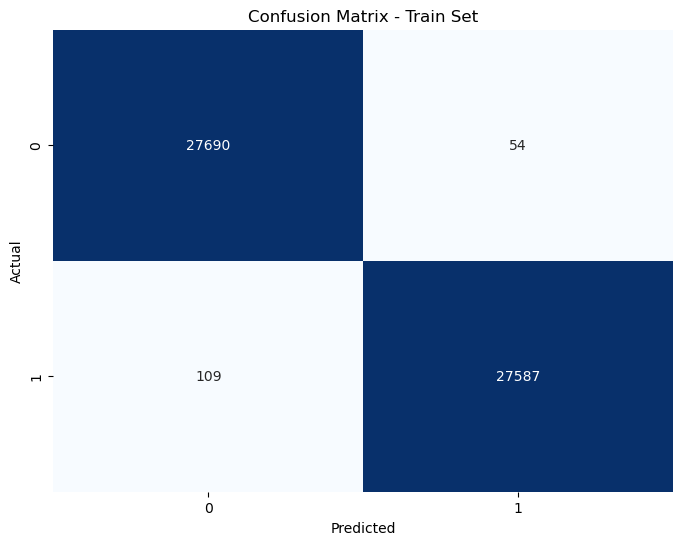

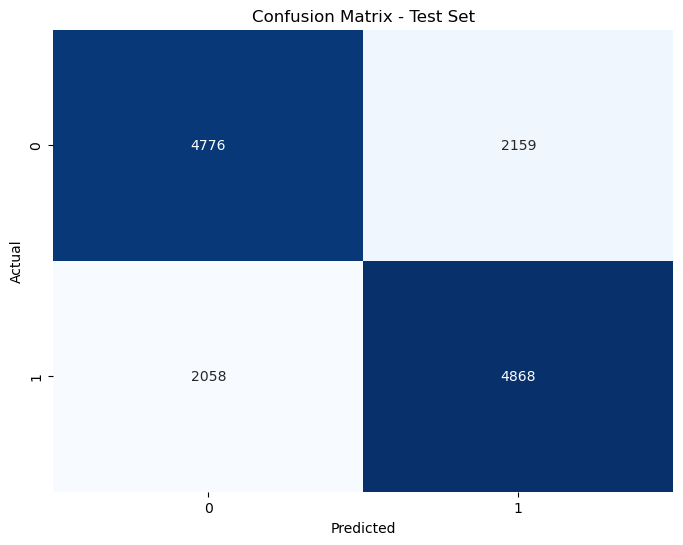

In [49]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Define the datasets and their titles for confusion matrix
datasets = [(y_train, y_pred_train, 'Confusion Matrix - Train Set'),
            (y_test, y_pred_test, 'Confusion Matrix - Test Set')]

# Loop through each dataset and plot the confusion matrix
for y_true, y_pred, title in datasets:
    plot_confusion_matrix(y_true, y_pred, title)

- Confusion matrix menunjukkan bahwa pada FN train = 104, dan FN test = 2061.
- Perbedaan besar dalam FN antara train dan test set menunjukkan bahwa model mungkin tidak dapat menggeneralisasi dengan baik pada data yang tidak terlihat sebelumnya.
- Model mungkin overfit pada data train atau mungkin data test memiliki distribusi yang berbeda dari data pelatihan. Ini menunjukkan bahwa model memerlukan penyesuaian untuk meningkatkan kemampuan generalisasi.
- Untuk menangani hal tersebut, kita akan coba melakukan pada model yang sama dan menggunakan Hyperparameter Tuning, untuk mengetahui apakah model akan improve.

# **Hyperparameter Tuning**

Pada tahap ini kita akan melakukan tuning pada parameter model Random Forest, yaitu ```n_estimator```, ``max_depth``, ``min_samples_split``, dan ``min_samples_leafnya``.

In [50]:
# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 5)]
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_search_params = {'n_estimators': n_estimators,
                        'max_depth':max_depth,
                        'min_samples_split':min_samples_split,
                        'min_samples_leaf':min_samples_leaf}
random_search_params

{'n_estimators': [200, 650, 1100, 1550, 2000],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8]}

### **Model Random Forest After Hyperparameter Tuning**

Berdasarkan parameter yang kita buat di atas, kita akan melakukan Random Search untuk menguji kombinasi terbaik yang ada di hyperparameter untuk digunakan selanjutnya dalam model classification.

In [51]:
#buat variable random search parameters
rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                 param_distributions=random_search_params,
                                 n_iter=20,
                                 cv=5,
                                 random_state=69,
                                 n_jobs=-1,
                                 scoring='recall')
rf_randomcv.fit(X_train_capped, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=69, scoring='recall')

Dari uji kombinasi random search diatas, parameter terbaik yang didapatkan adalah ``max_depth=890``, ``min_samples_split=5``, ``n_estimators=2000``. Selanjutnya kita simpan di nama variabel baru best estimatornya, dengan nama variabel ``rf_randomcv_best``

In [52]:
#variable best model
rf_randomcv_best = rf_randomcv.best_estimator_

In [53]:
#pipe best model
best_model = make_pipeline(ct,rf_randomcv_best)
#fit
best_model.fit(X_train_capped,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num', StandardScaler(),
                                                  ['age', 'weight', 'ap_hi',
                                                   'ap_lo'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=890, min_samples_split=5,
                                        n_estimators=2000))])

### **Model Evaluation After Hyperparameter Tuning**

Setelah mencari best estimator yang dilakukan pada Random Search, selanjutnya variable best estimator tadi kita masukkan ke dalam variable ``.predict`` sebagai model terbaru yang sudah dilakukan hyperparameter.

In [54]:
#classification report after 
y_pred_trainh = best_model.predict(X_train_capped)
y_pred_testh = best_model.predict(X_test)

print('\n')
print('Train')
print(classification_report(y_train, y_pred_train))
print('-'* 58)
print('\n')

print('Test')
print(classification_report(y_test, y_pred_test))



Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27744
           1       1.00      1.00      1.00     27696

    accuracy                           1.00     55440
   macro avg       1.00      1.00      1.00     55440
weighted avg       1.00      1.00      1.00     55440

----------------------------------------------------------


Test
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      6935
           1       0.69      0.70      0.70      6926

    accuracy                           0.70     13861
   macro avg       0.70      0.70      0.70     13861
weighted avg       0.70      0.70      0.70     13861



Untuk classification report, tidak terdapat perbedaan signifikan pada recall, dimana recall untuk kelas 1 berada pada 70%. Dalam artian, untuk presentase recall sebelum dan sesudah dilakukan tuning tidak mengalami perubahan. Namun, coba kita lihat pada confusion matrix dari model yang sudah dilakukan hyperparameter, apakah terdapat improvement dari segi pendeteksian False Negativenya.

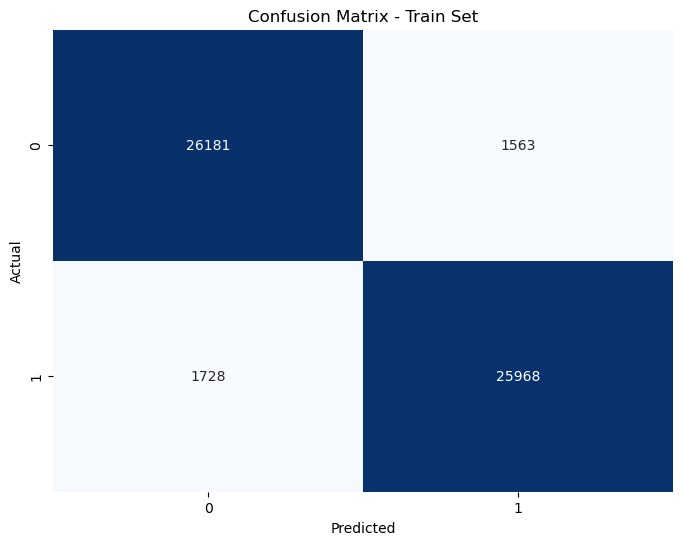

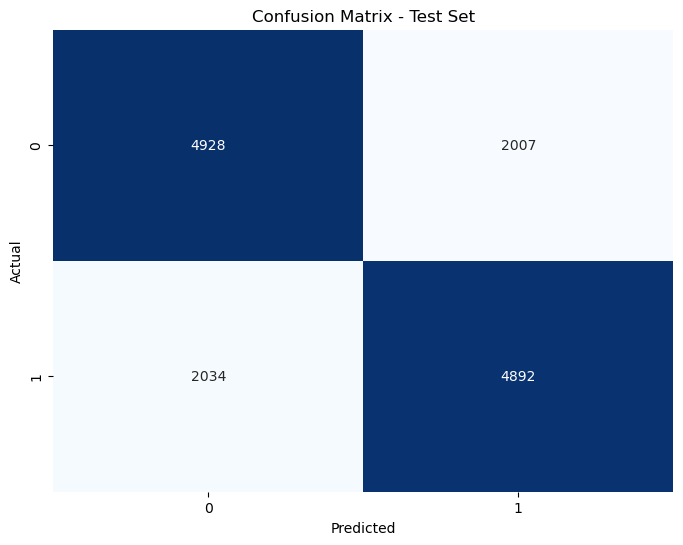

In [55]:
# Define the datasets and their titles for confusion matrix
datasets = [(y_train, y_pred_trainh, 'Confusion Matrix - Train Set'),
            (y_test, y_pred_testh, 'Confusion Matrix - Test Set')]

# Loop through each dataset and plot the confusion matrix
for y_true, y_pred, title in datasets:
    plot_confusion_matrix(y_true, y_pred, title)

Berdasarkan visualisasi confusinal terdapat perbedaan pada hasil FN, pada data train untuk False Negative pada confusion matrixnyanya sebesar 1748, bisa dibilang menurun dari data train sebelum dilakukan hyperparameter sebesar 104, setelah dilakukan hyperparameter menjadi 1748. Akan tetapi, pada data test terdapat improve di confusion matrixnya, dari yang sebelum dilakukan hyperparameter sebesar 2058, bisa di reduce menjadi 2034.

# **viii. Conclusion**

### 1. Exploratory Data Analysis
-  **Jumlah perempuan yang terindikasi memiliki penyakit kardiovaskular jauh lebih tinggi dibandingkan laki-laki**. Ini menunjukkan perlunya perhatian khusus terhadap kesehatan jantung perempuan, yang mungkin lebih rentan terhadap faktor-faktor risiko tertentu.  

- **Usia rata-rata yang lebih tinggi pada pasien dengan penyakit kardiovaskular menegaskan bahwa risiko penyakit jantung meningkat seiring bertambahnya usia**. Oleh karena itu,program pemeriksaan kesehatan rutin dan tindakan pencegahan harus lebih difokuskan pada kelompok usia yang lebih tua, khususnya di atas 50 tahun 

- **Korelasi positif yang kuat antara tekanan darah sistolik dan diastolik dengan kejadian penyakit kardiovaskular menekankan pentingnya mengontrol tekanan darah sebagai langkah pencegahan**. Pasien dengan tekanan darah tinggi harus diberikan perawatan dan edukasi khusus untuk menurunkan risiko mereka.

- **Pasien dengan kadar glukosa dan kolesterol yang lebih tinggi memiliki risiko yang lebih besar untuk terkena penyakit kardiovaskular**. Ini menunjukkan bahwa pengelolaan diet, pengendalian berat badan, dan pemeriksaan kadar glukosa dan kolesterol secara rutin harus menjadi bagian dari program pencegahan penyakit jantung.

- **Pasien yang tidak terindikasi memiliki tingkat aktivitas fisik yang lebih tinggi, yang menunjukkan bahwa gaya hidup aktif dapat mengurangi risiko penyakit kardiovaskular**. Kampanye promosi kesehatan yang mendorong aktivitas fisik dan olahraga rutin dapat menjadi strategi efektif untuk mengurangi risiko ini.

- **Korelasi moderat antara usia, kolesterol, dan kejadian penyakit kardiovaskular menunjukkan pentingnya memonitor kadar kolesterol seiring bertambahnya usia**. Program kesehatan harus mencakup pemantauan kolesterol secara rutin dan edukasi tentang pola makan sehat untuk individu yang lebih tua.

- **Meski merokok dikenal sebagai faktor risiko penyakit jantung, data menunjukkan korelasi yang sangat lemah antara kebiasaan merokok dan kejadian penyakit kardiovaskular**. Hal ini mungkin disebabkan oleh variabel lain yang lebih dominan dalam mempengaruhi risiko, atau bisa jadi ada bias data. 

**Rekomendasi** :  

- Lakukan kampanye edukasi yang menargetkan perempuan, serta peningkatan akses ke pemeriksaan kardiovaskular rutin di klinik dan fasilitas kesehatan lainnya.  
- Klinik dapat menyediakan paket pemeriksaan khusus untuk individu di atas 50 tahun, dengan jadwal pemeriksaan berkala. Edukasi mengenai pentingnya pencegahan dan deteksi dini juga perlu ditingkatkan. 
- Klinik bisa menyediakan konsultasi gratis tentang manajemen tekanan darah dan menyediakan akses mudah ke pemeriksaan tekanan darah bagi pasien yang berisiko.
- Klinik dapat bekerja sama dengan ahli gizi untuk menyediakan konsultasi diet personal dan program manajemen berat badan yang disesuaikan dengan kondisi pasien. 
- Klinik dapat mengadakan program olahraga komunitas atau kelas aktivitas fisik, serta memberikan panduan tentang latihan fisik yang aman dan efektif.
- Berikan layanan tes kolesterol rutin yang terjangkau dan mudah diakses, serta konseling gizi untuk membantu pasien mengelola kadar kolesterol mereka.  
- Kampanye edukasi yang berkelanjutan tentang bahaya merokok, serta program penghentian merokok harus tetap menjadi prioritas, dengan dukungan konseling dan terapi bagi perokok yang ingin berhenti.


### 2. Model
Berdasarkan hasil, didapatkan bahwa perbandingan performa model sebagai berikut:


| Result                       | Before| After|
|--------------------------------|--------|-------|
| Train Recall      | 1.00  | 1.00  |
| Test Recall   | 0.70  | 0.70  |
| Train FN | 109 | 1728 |
| Test FN  | 2058 | 2034 |

- Recall Tetap Stabil: 
Nilai recall pada data train tetap pada 1.00 sebelum dan sesudah perubahan, yang berarti model mampu mengidentifikasi semua kasus positif secara benar tanpa ada yang terlewatkan. Pada data test, recall juga tetap stabil di 0.70, menunjukkan bahwa model mampu mendeteksi 70% dari kasus positif yang ada di data test.
- Terdapat peningkatan signifikan pada jumlah False Negative (FN) di data train dari 109 menjadi 1733. Hal ini menunjukkan bahwa meskipun recall tetap sempurna, jumlah kasus positif yang salah diklasifikasikan sebagai negatif meningkat setelah perubahan. Ini mungkin menandakan adanya overfitting pada model yang telah diubah, di mana model terlalu baik di data train sehingga tidak bisa menangkap variasi yang sebenarnya.

- Pada data test, jumlah FN sedikit berkurang dari 2058 menjadi 2034. Ini menunjukkan sedikit perbaikan dalam kemampuan model untuk mengidentifikasi kasus positif pada data yang tidak terlihat selama pelatihan, meskipun recall keseluruhan tetap sama.

- Kelemahan :  

    a. Meskipun tidak sempurna, recall sebesar 0.70 masih signifikan untuk aplikasi klinis. Dengan mendeteksi 70% dari pasien berisiko tinggi, model memberikan nilai tambah yang besar dalam mengurangi risiko kesehatan publik dan biaya perawatan jangka panjang, dengan mengidentifikasi pasien yang membutuhkan perawatan lebih awal.  

    b. Pendeteksian pada FN belum optimal, karena hanya mereduce puluhan angka dari yang sebelum dilakukan hyperparameter tuning. 
    
    c. Pada komputasi dan FE tidak terdapat masalah pada komputasi, hanya perlu pemilihan hyperparameter yang sesuai. 

    d. Setelah perubahan model, jumlah FN di data train meningkat dari 109 menjadi 1728. Hal ini menunjukkan bahwa model mungkin mengalami overfitting, di mana model belajar terlalu spesifik dari data train, mengakibatkan kurangnya kemampuan untuk menangkap variasi pada data yang tidak terlihat.
- Kelebihan :  

    a. Bisa improve pendeteksian FN walaupun belum optimal, namun terdapat improvement yang menambah kinerja deteksi.

- Model Improvement : 

    a. Menentukan parameter hyperparameter tuning yang lebih baik seperti menambah bagging, untuk meningkatkan performa agar model tidak overfitting.  
 
    b. Mencari model yang lebih baik dan sesuai dengan tipe data  

    c. Mengimplementasikan sistem feedback dari tim kesehatan untuk memperbarui model berdasarkan kasus baru yang mungkin tidak diidentifikasi dengan baik oleh model saat ini.


# **ix. Model Saving**

In [56]:
#save model yang udah dibuat
with open('best_model.pkl', 'wb') as file_1:
    pickle.dump(best_model, file_1)

# **Conseptual Problems**

- Bagging adalah sebuah teknik dalam machine learning yang digunakan untuk meningkatkan kinerja model prediksi dengan cara menggabungkan hasil dari beberapa model yang dibangun dengan dataset yang sama tetapi dengan sampel yang diambil secara acak dengan penggantian. Latar belakang utama munculnya metode bagging ini dilakukan untuk mengatasi/mengurangi overfitting dan mengurangi variansi model, sehingga nantinya meningkatkan kestabilan dan kinerja prediksi. Cara kerja dari bagging sebagai berikut:  

    - Pertama, dataset awal diambil sampel dengan penggantian (bootstrap sampling) untuk membuat beberapa dataset latihan yang berbeda.
    - Kemudian, model yang sama dibangun pada setiap dataset latihan.
    - Hasil prediksi dari setiap model diambil secara rata-rata (untuk regresi) atau melalui voting (untuk klasifikasi) untuk menghasilkan prediksi akhir.

-   A. Random Forest:  

    Random Forest adalah sebuah algoritma ensemble learning yang terdiri dari kumpulan pohon keputusan. Setiap pohon keputusan dalam Random Forest dibangun secara independen menggunakan subset dari dataset latihan yang diambil secara acak. Prediksi akhir dari Random Forest diambil melalui majority voting dari semua pohon keputusan. Umumnya lebih cepat untuk melatih karena pohon-pohon dapat dilatih secara paralel, mengingat setiap pohon dilatih secara independen dari yang lain dan lebih sederhana dalam hal implementasi dan tuning dibandingkan XGBoost, yang menjadikannya pilihan yang baik untuk baseline model.

    B. XGBOOST:  

    XGBoost adalah algoritma machine learning yang sangat populer dan powerful, yang digunakan untuk klasifikasi dan regresi. Proses algoritma membangun pohon keputusan secara bertahap, di mana setiap pohon baru dibangun untuk memperbaiki kesalahan dari pohon sebelumnya. XGBoost mengoptimalkan fungsi loss dengan pendekatan gradient descent dan menambah pohon secara sekuensial. Model ini juga lebih cepat dalam prediksi dan kadang-kadang dalam pelatihan karena mengoptimalkan komputasi dan memori. XGBoost mendukung paralelisme level fitur (feature-wise parallelism) dan optimisasi CPU dan memori. Memerlukan tuning hyperparameter yang lebih kompleks untuk mencapai performa terbaik, tetapi dengan tuning yang tepat, XGBoost sering kali memberikan akurasi yang lebih baik daripada Random Forest.

- Cross Validation adalah sebuah teknik yang digunakan untuk mengevaluasi kinerja dari suatu model machine learning dengan cara membagi dataset menjadi beberapa subset (fold) yang saling tumpang tindih, kemudian melatih dan menguji model pada setiap fold secara bergantian. Hal ini dilakukan untuk menghindari overfitting dan memberikan estimasi yang lebih baik terhadap kinerja model pada data baru yang belum pernah dilihat sebelumnya. Salah satu metode cross validation yang umum digunakan adalah k-fold cross validation, di mana dataset dibagi menjadi k subset, dan model dilatih dan diuji sebanyak k kali, di mana setiap subset digunakan sebagai data uji satu kali. Hasil dari k percobaan tersebut kemudian diambil rata-ratanya untuk mendapatkan estimasi kinerja model secara keseluruhan.